In [1]:
!pip install transformers -q
!pip install sentencepiece -q

In [2]:
import pandas as pd

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *
from plotting_helper import *
from common_helpers import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

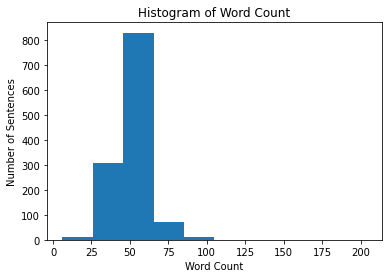

In [4]:
plot_histogram(data['Lyric'])

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [5]:
MAX_SEQ_LEN = 75
gpu, cpu = get_devices()

In [6]:
chk_point = 'google/muril-base-cased'
base_model, tokenizer = load_bert_model(chk_point)

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [ ]:
txt_only_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.TXT,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=2, clip_at=1.0, img_path=IMG_PATH, hidden_dim=150)

Running Text Only Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model
Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.700 / Validation : 0.688
Time for epoch : 8.548153 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.693 / Validation : 0.688
Time for epoch : 4.380322 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.688
Time for epoch : 8.06512 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.691 / Validation : 0.688
Time for epoch : 7.94248 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.691 / Validation : 0.687
Time for epoch : 8.051719 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.691 / Validation : 0.687
Time for epoch : 8.652377 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.691 / Validation : 0.680
Time for epoch : 12.404026 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.689 / Validation : 0.676
Time for epoch : 8.779111 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.606 / Validation : 0.445
Time for epoch : 11.7

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


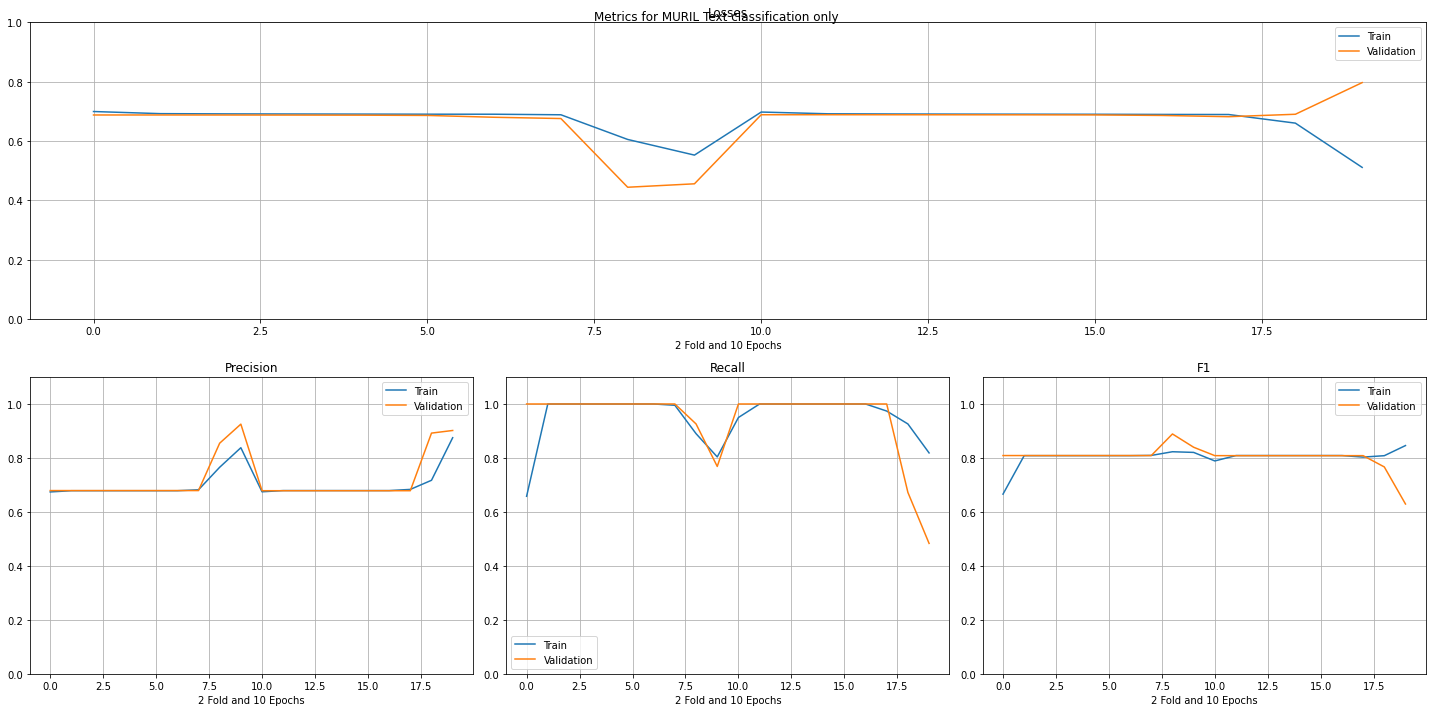

In [ ]:
plot_results(txt_only_results[0], 'MURIL Text classification only')

In [ ]:
txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
8,0.765432,0.889952,0.823009,0.854626,0.926014,0.888889,0.605630,0.444596
9,0.837905,0.803828,0.820513,0.925287,0.768496,0.839635,0.552885,0.456172
7,0.681967,0.995215,0.809339,0.679092,1.000000,0.808880,0.688760,0.676095
2,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.691764,0.687972
3,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.691389,0.687788
4,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.691043,0.687462
5,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.690717,0.686533
6,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.690613,0.680373
1,0.678571,1.000000,0.808511,0.679092,1.000000,0.808880,0.692568,0.688111
0,0.674020,0.657895,0.665860,0.679092,1.000000,0.808880,0.699738,0.688073


In [ ]:
mfcc_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MFCC,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=1, clip_at=1.0, img_path=IMG_PATH, hidden_dim=200)

Running Fusion Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.718 / Validation : 0.686
Time for epoch : 7.931633 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.701 / Validation : 0.685
Time for epoch : 8.135993 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.701 / Validation : 0.685
Time for epoch : 8.064786 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.695 / Validation : 0.683
Time for epoch : 8.587231 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.696 / Validation : 0.682
Time for epoch : 11.47425 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.690 / Validation : 0.682
Time for epoch : 11.468346 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.689 / Validation : 0.682
Time for epoch : 3.863296 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.688 / Validation : 0.680
Time for epoch : 8.135013 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.688 / Validation : 0.679
Time for epoch : 8.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


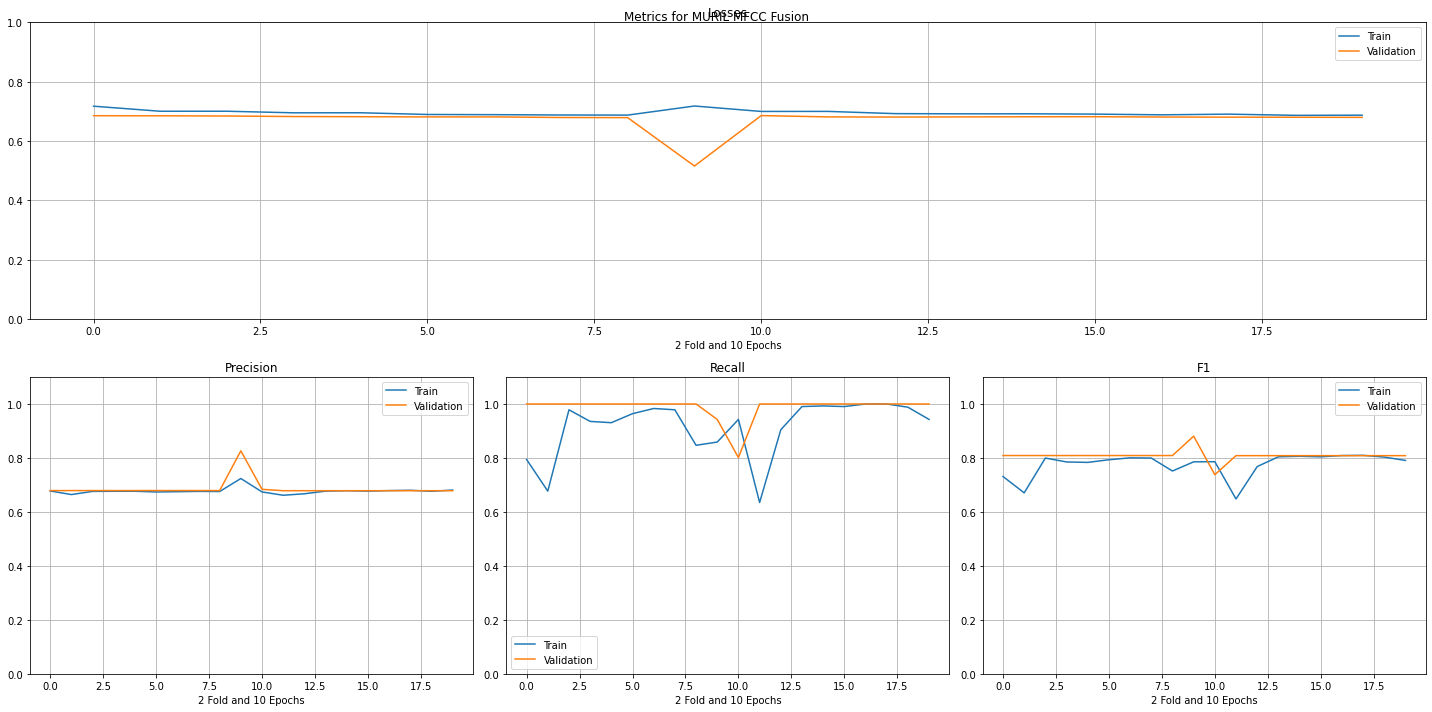

In [ ]:
plot_results(mfcc_fusion_results[0], 'MURIL MFCC Fusion')

In [ ]:
mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
9,0.723790,0.858852,0.785558,0.826360,0.942721,0.880713,0.718303,0.516155
6,0.674877,0.983254,0.800389,0.679092,1.000000,0.808880,0.689147,0.681597
2,0.676033,0.978469,0.799609,0.679092,1.000000,0.808880,0.700677,0.684602
7,0.676033,0.978469,0.799609,0.679092,1.000000,0.808880,0.688022,0.679581
5,0.673913,0.964115,0.793307,0.679092,1.000000,0.808880,0.689776,0.681561
3,0.676471,0.935407,0.785141,0.679092,1.000000,0.808880,0.695343,0.682833
4,0.676522,0.930622,0.783484,0.679092,1.000000,0.808880,0.695546,0.682237
8,0.675573,0.846890,0.751592,0.679092,1.000000,0.808880,0.687659,0.679097
0,0.677551,0.794258,0.731278,0.679092,1.000000,0.808880,0.717708,0.685625
1,0.664319,0.677033,0.670616,0.679092,1.000000,0.808880,0.700620,0.685296


In [15]:
mel_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MEL,
                                k_folds=2, epochs=15, 
                                balance_classes=True, dropout_level=0.1,
                                lr=6e-4,
                                max_seq_len=MAX_SEQ_LEN,
                                n_layers=1,
                                clip_at=1.0, img_path=IMG_PATH, hidden_dim=64,
                                img_height=80, img_width=80)

Running Fusion Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Evaluating
Losses - Train : 0.701 / Validation : 0.688


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Time for epoch : 43.486155 seconds
Epoch 2 / 15
Training Model
Evaluating
Losses - Train : 0.695 / Validation : 0.689
Time for epoch : 38.784586 seconds
Epoch 3 / 15
Training Model
Evaluating
Losses - Train : 0.693 / Validation : 0.688
Time for epoch : 39.02614 seconds
Epoch 4 / 15
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.688
Time for epoch : 41.716725 seconds
Epoch 5 / 15
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.688
Time for epoch : 44.401945 seconds
Epoch 6 / 15
Training Model
Evaluating
Losses - Train : 0.691 / Validation : 0.688
Time for epoch : 44.17121 seconds
Epoch 7 / 15
Training Model
Evaluating
Losses - Train : 0.691 / Validation : 0.687
Time for epoch : 44.434904 seconds
Epoch 8 / 15
Training Model
Evaluating
Losses - Train : 0.690 / Validation : 0.679
Time for epoch : 46.629305 seconds
Epoch 9 / 15
Training Model
Evaluating
Losses - Train : 0.656 / Validation : 0.422
Time for epoch : 42.297445 seconds
Epoch 10 / 15
Training 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating
Losses - Train : 0.624 / Validation : 0.492
Time for epoch : 38.625641 seconds
Epoch 12 / 15
Training Model
Evaluating
Losses - Train : 0.504 / Validation : 0.530
Time for epoch : 35.304829 seconds
Epoch 13 / 15
Training Model
Evaluating
Losses - Train : 0.418 / Validation : 0.563
Time for epoch : 35.138985 seconds
Epoch 14 / 15
Training Model
Evaluating
Losses - Train : 0.463 / Validation : 0.526
Time for epoch : 35.021718 seconds
Epoch 15 / 15
Training Model
Evaluating
Losses - Train : 0.409 / Validation : 0.618
Time for epoch : 35.075417 seconds
On Train Data
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       198
           1       0.80      0.82      0.81       419

    accuracy                           0.74       617
   macro avg       0.70      0.69      0.70       617
weighted avg       0.74      0.74      0.74       617

On Test Data
              precision    recall  f1-score   support

           0       0.67  

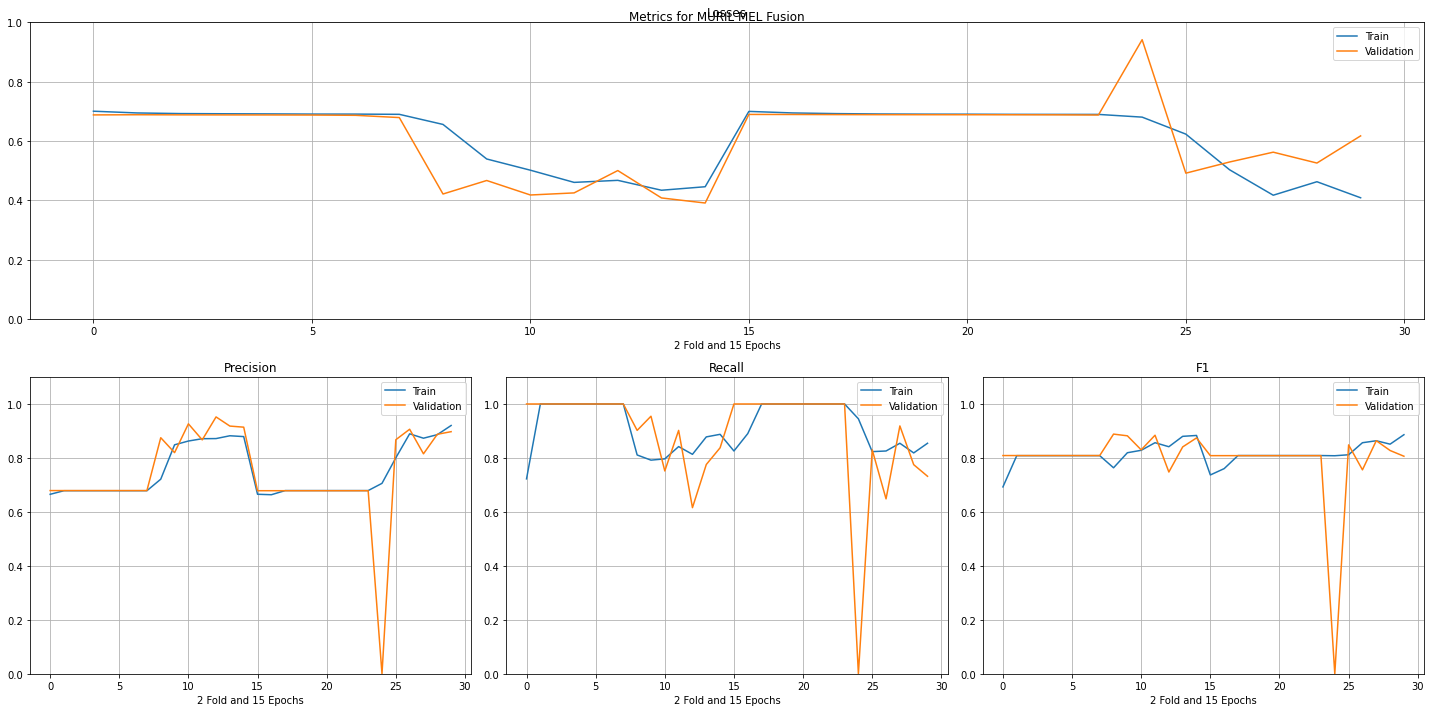

In [16]:
plot_results(mel_fusion_results[0], 'MURIL MEL Fusion')

In [17]:
mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
8,0.763514,0.888367,0.721277,0.875000,0.811005,0.902148,0.656232,0.421808
11,0.856448,0.884211,0.871287,0.866972,0.842105,0.902148,0.460970,0.425522
9,0.819307,0.882029,0.848718,0.819672,0.791866,0.954654,0.539817,0.467321
14,0.883333,0.874222,0.879147,0.914062,0.887560,0.837709,0.446300,0.391492
12,0.863691,0.863892,0.873171,0.815287,0.854415,0.918660,0.417752,0.562744
10,0.811765,0.848411,0.800464,0.867500,0.823389,0.830144,0.623584,0.492013
13,0.880096,0.840880,0.882212,0.918079,0.877990,0.775656,0.434507,0.408543
10,0.828358,0.830040,0.862694,0.926471,0.796651,0.751790,0.502022,0.418478
13,0.851117,0.827586,0.886305,0.887671,0.818616,0.775120,0.463192,0.526136
1,0.808511,0.808880,0.678571,0.679092,1.000000,1.000000,0.694904,0.688896
